In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import (
    KFold, StratifiedKFold, train_test_split)
from sklearn.feature_selection import RFECV

from sklearn.svm import SVC

import joblib

from libs.container import Container
import dataset

In [2]:
cpu = joblib.cpu_count()

In [3]:
data = dataset.load_scaled()

df = pd.concat([data.b278, data.b261])

cls = {name: idx for idx, name in enumerate(df.tile.unique())}
df["cls"] = df.tile.apply(cls.get)

print(cls)

del data

Reading '/mnt/is0/jbcabral/denoise/dataset/full_scaled.pkl.bz2'
{'b278': 0, 'b261': 1}


In [4]:
sel = joblib.load("results/rfecv.pkl.bz2")

In [6]:
df = pd.DataFrame({
    "Feature": dataset.FEATURES, 
    "Selected": sel.support_, "Ranking": sel.ranking_})
df = df.reset_index(drop=True)

In [8]:
print("Selected Features: ", sum(df.Selected.values))

Selected Features:  28


In [9]:
def is_selected(row):
    if row.Selected:
        return pd.Series('background-color: #7EA489', row.index)
    return pd.Series('', row.index)


with pd.option_context('display.precision', 4):
    html = df.sort_values("Ranking").style.apply(is_selected, axis=1)
html

,Feature,Selected,Ranking
0,Amplitude,True,1
34,Mean,True,1
36,MedianBRP,True,1
38,PercentAmplitude,True,1
39,PercentDifferenceFluxPercentile,True,1
43,Psi_eta,True,1
44,Q31,True,1
45,Rcs,True,1
48,Std,True,1
50,c89_hk_color,True,1


In [11]:
X = df[dataset.FEATURES].values
y = df.cls.values
sel.score(X, y)

KeyError: "None of [Index(['Amplitude', 'Autocor_length', 'Beyond1Std', 'Con', 'Eta_e',\n       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',\n       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',\n       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',\n       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',\n       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',\n       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',\n       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',\n       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',\n       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',\n       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',\n       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',\n       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',\n       'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3', 'Gskew',\n       'LinearTrend', 'MaxSlope', 'Mean', 'MedianAbsDev', 'MedianBRP',\n       'PairSlopeTrend', 'PercentAmplitude', 'PercentDifferenceFluxPercentile',\n       'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta', 'Q31', 'Rcs', 'Skew',\n       'SmallKurtosis', 'Std', 'c89_c3', 'c89_hk_color', 'c89_jh_color',\n       'c89_jk_color', 'c89_m2', 'c89_m4', 'n09_c3', 'n09_hk_color',\n       'n09_jh_color', 'n09_jk_color', 'n09_m2', 'n09_m4', 'ppmb'],\n      dtype='object')] are in the [columns]"

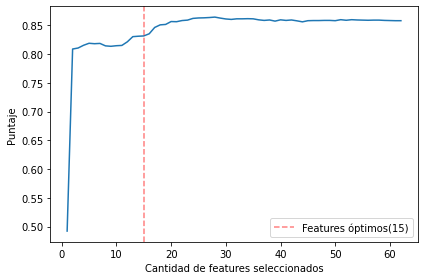

In [12]:
plt.figure()
plt.xlabel("Cantidad de features seleccionados")
plt.ylabel("Puntaje")
plt.plot(range(1, len(sel.grid_scores_) + 1), sel.grid_scores_)
plt.axvline(15, c="r", alpha=0.5, ls="--", label=u"Features óptimos (15)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/rfe.pdf")
plt.show()

In [ ]:
sX_columns = df[df.Selected].Feature.values

In [ ]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(**RF_PARAMS), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=sX_columns, y_column="cls")
rf = rf("data", nfolds=10)

In [ ]:
list(sX_columns)

In [ ]:
rf_all = np.load("data/results/model_selection.pkl.npy")[0]

In [ ]:
ax = roc({"RFE-RF": rf, "RF": rf_all});
ax.get_children()[0].set_color("red")
ax.get_children()[1].set_color("blue")
plt.legend()

plt.tight_layout()
plt.savefig("plots/rfe_vs_all.pdf")

In [ ]:
print(
    pd.DataFrame([
        ["RF", rf_all.prec_rec[0], rf_all.prec_rec[1], rf_all.roc_auc],
        ["RFE-RF", rf.prec_rec[0], rf.prec_rec[1], rf.roc_auc]],
        columns="Modelo Precision Recall AUC".split()
    ).to_latex(index=False, float_format="%.4f"))